# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import bnlearn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import hypergeom

# Read data

In [2]:
# Get root directory
root_dir = os.path.dirname(os.path.abspath(''))

# read data
data = pd.read_csv(
    os.path.join(root_dir, 'data', 'CHC_base_anonimizada09-09-2021.csv')
    )

# filter data
filtered_data = pd.read_csv(
    os.path.join(root_dir, 'data', 'filtered_data.csv')
)

# Homelessness Aplication

## All Variables

In [73]:
df = filtered_data[[
    'ln_years_street',
    'drug_consumption',
    'age',
    'family_contact',
    'disease'
]].copy()

In [74]:
# Learn the DAG in data using Bayesian structure learning:
DAG = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [75]:
# Compute edge strength with the chi_square test statistic
model_sl = bn.independence_test(DAG, df, test='chi_square', prune=True)

[bnlearn] >Compute edge strength with [chi_square]


In [76]:
edge_properties = bn.get_edge_properties(model_sl)

[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


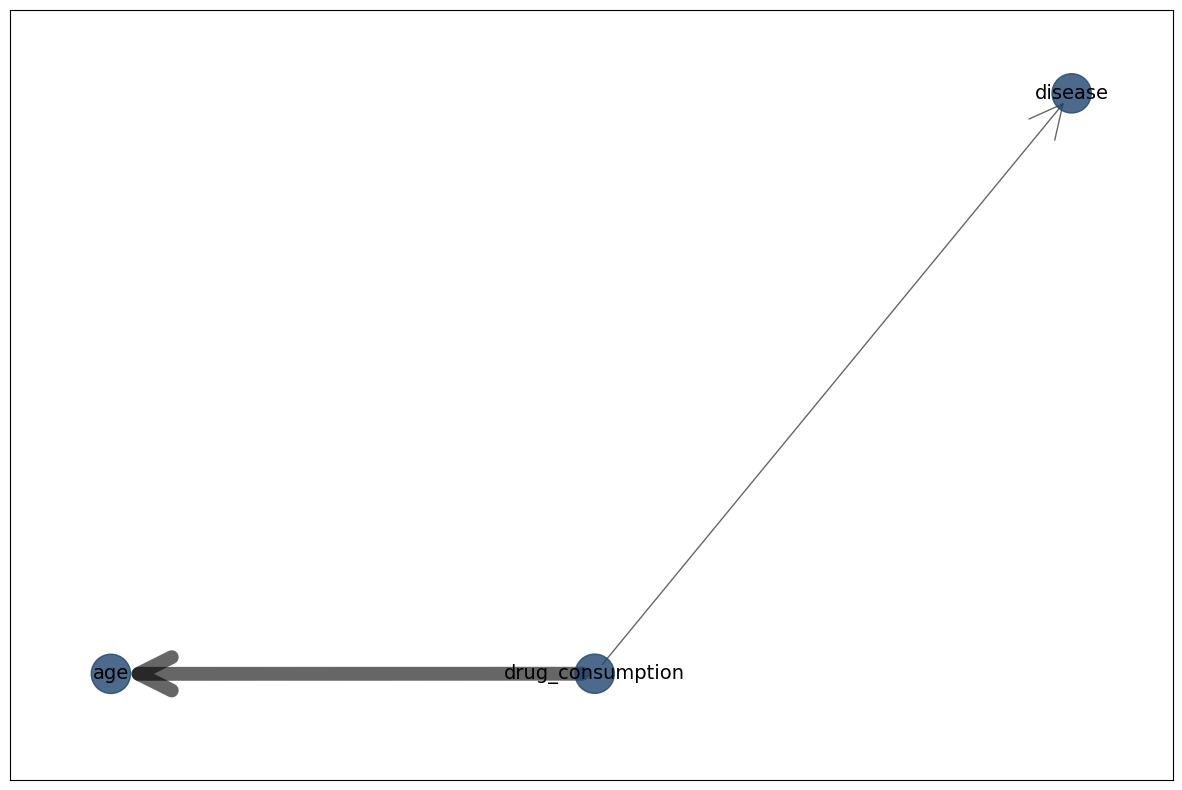

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'ln_years_street': array([ 1.        , -0.61812449]),
  'drug_consumption': array([-0.07813492,  0.47416425]),
  'age': array([-0.83812058,  0.47413939]),
  'family_contact': array([-0.75472413, -0.93144739]),
  'disease': array([0.67097964, 0.60126825])},
 'G': <networkx.classes.digraph.DiGraph at 0x18867a710>,
 'node_properties': {'ln_years_street': {'node_color': '#1f456e',
   'node_size': 800},
  'drug_consumption': {'node_color': '#1f456e', 'node_size': 800},
  'age': {'node_color': '#1f456e', 'node_size': 800},
  'family_contact': {'node_color': '#1f456e', 'node_size': 800},
  'disease': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('drug_consumption', 'age'): {'color': '#000000',
   'weight': 9.999999999999998},
  ('drug_consumption', 'disease'): {'color': '#000000', 'weight': 1.0}}}

In [77]:
# Plot
params_static={'edge_alpha':0.6, 'arrowstyle':'->', 'arrowsize':60}
bn.plot(model_sl, interactive=False, params_static=params_static)

In [31]:
# 'hc' or 'hillclimbsearch'
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_cs_bic  = bn.structure_learning.fit(df, methodtype='cs', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.


In [33]:
# Parameter learning on the user-defined DAG and input data using bayes estimate
model = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# Print the learned CPDs
bn.print_CPD(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of drug_consumption:
+---------------------+----------+
| drug_consumption(0) | 0.248738 |
+---------------------+----------+
| drug_consumption(1) | 0.751262 |
+---------------------+----------+
[bnlearn] >CPD of age:
+------------------+----------------------+-----------------------+
| drug_consumption | drug_consumption(0)  | drug_consumption(1)   |
+------------------+----------------------+-----------------------+
| age(15.0)        | 0.02675759119307258  | 0.004030384486977826  |
+------------------+----------------------+-----------------------+
| age(16.0)        | 0.008368244331943832 | 0.0034005293536584903 |
+------------------+----------------------+-----------------------+
| age(17.0)        | 0.008368244331943832 | 0.006759756731361615  |
+------------------+--------

{'drug_consumption':    drug_consumption         p
 0                 0  0.248738
 1                 1  0.751262,
 'age':      age  drug_consumption         p
 0      0                 0  0.026758
 1      0                 1  0.004030
 2      1                 0  0.008368
 3      1                 1  0.003401
 4      2                 0  0.008368
 ..   ...               ...       ...
 117   58                 1  0.004450
 118   59                 0  0.016612
 119   59                 1  0.003191
 120   60                 0  0.080023
 121   60                 1  0.009489
 
 [122 rows x 3 columns],
 'disease':    disease  drug_consumption         p
 0        0                 0  0.714648
 1        0                 1  0.866891
 2        1                 0  0.285352
 3        1                 1  0.133109}

## Drugs

In [45]:
drugs = data[['P30S1', 'P30S2',	'P30S3', 'P30S4', 'P30S5',
     'P30S6', 'P30S7', 'P30S8', 'P30S9']].copy()

drugs.rename(columns={
        'P30S1': 'Cigarrillo',
        'P30S2': 'Alcohol',
        'P30S3': 'Marihuana',
        'P30S4': 'Inhalantes',
        'P30S5': 'Cocaina',
        'P30S6': 'Basuco',
        'P30S7': 'Heroina',
        'P30S8': 'Pepas',
        'P30S9': 'Otras'
         }, inplace=True)

drugs.replace({
    1: True,
    2: False
}, inplace=True)

# drop empty rows
drugs = drugs.dropna()

drugs

,Cigarrillo,Alcohol,Marihuana,Inhalantes,Cocaina,Basuco,Heroina,Pepas,Otras
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6243,True,False,False,False,False,True,False,False,False
6244,True,True,False,False,False,False,False,False,False
6245,False,False,False,False,False,False,False,False,False
6246,True,False,False,False,False,True,False,False,False


In [60]:
# Learn the DAG in data using Bayesian structure learning:
DAG = bn.structure_learning.fit(drugs, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


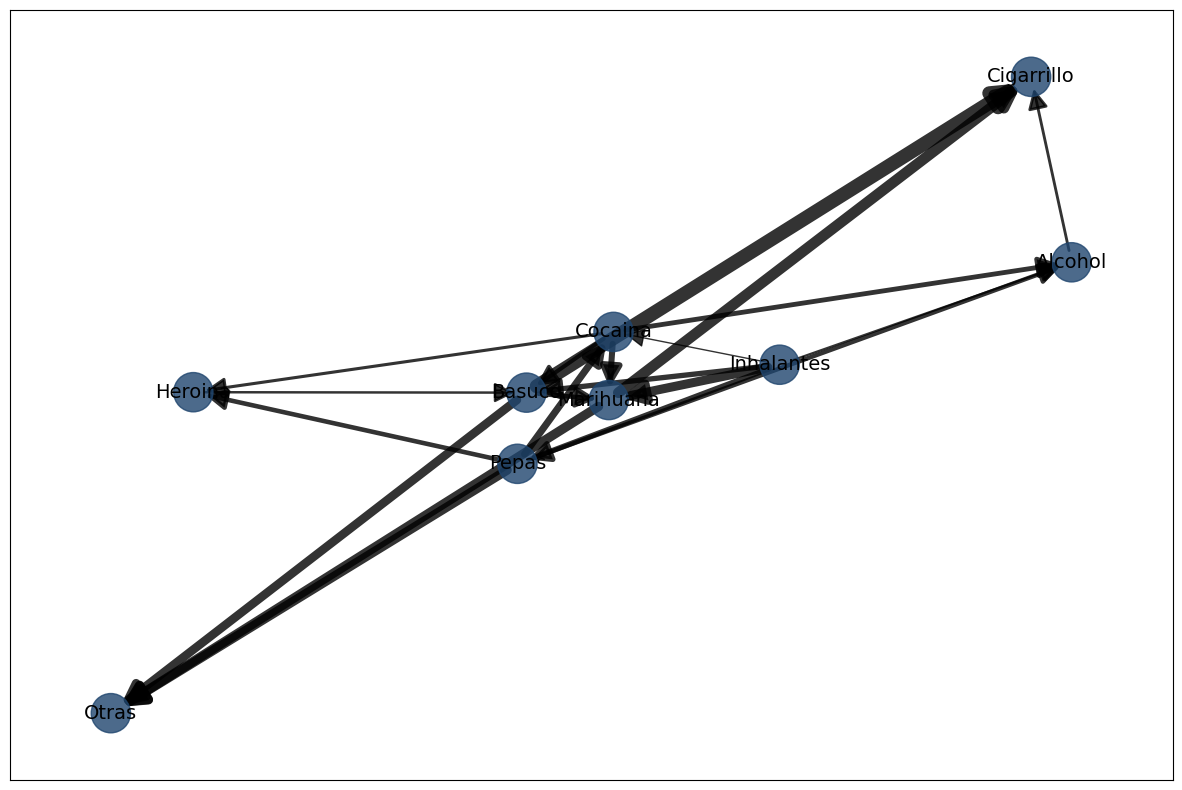

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Cigarrillo': array([0.30831579, 0.89579381]),
  'Alcohol': array([0.33767987, 0.34324119]),
  'Marihuana': array([ 0.00209639, -0.06711251]),
  'Inhalantes': array([0.12599526, 0.03809421]),
  'Cocaina': array([0.00555543, 0.13592015]),
  'Basuco': array([-0.05756082, -0.04504024]),
  'Heroina': array([-0.29909774, -0.04376994]),
  'Pepas': array([-0.06411264, -0.25712667]),
  'Otras': array([-0.35887154, -1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x18847fc10>,
 'node_properties': {'Cigarrillo': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Marihuana': {'node_color': '#1f456e', 'node_size': 800},
  'Inhalantes': {'node_color': '#1f456e', 'node_size': 800},
  'Cocaina': {'node_color': '#1f456e', 'node_size': 800},
  'Basuco': {'node_color': '#1f456e', 'node_size': 800},
  'Heroina': {'node_color': '#1f456e', 'node_

In [63]:
# Compute edge strength with the chi_square test statistic
model_sl = bn.independence_test(DAG, drugs)

# Plot based on structure learning of sampled data
bn.plot(model_sl)

In [65]:
# Parameter learning on the user-defined DAG and input data using bayes estimate
model = bn.parameter_learning.fit(DAG, drugs, methodtype='bayes')

# Print the learned CPDs
bn.print_CPD(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Alcohol:
+----------------+-----+--------------------+
| Cocaina        | ... | Cocaina(True)      |
+----------------+-----+--------------------+
| Inhalantes     | ... | Inhalantes(True)   |
+----------------+-----+--------------------+
| Pepas          | ... | Pepas(True)        |
+----------------+-----+--------------------+
| Alcohol(False) | ... | 0.3834080717488789 |
+----------------+-----+--------------------+
| Alcohol(True)  | ... | 0.6165919282511211 |
+----------------+-----+--------------------+
[bnlearn] >CPD of Cigarrillo:
+-------------------+-----+---------------------+
| Alcohol           | ... | Alcohol(True)       |
+-------------------+-----+---------------------+
| Basuco            | ... | Basuco(True)        |
+-------------------+-----+----------------

{'Alcohol':     Alcohol  Cocaina  Inhalantes  Pepas         p
 0         0        0           0      0  0.793044
 1         0        0           0      1  0.552966
 2         0        0           1      0  0.609116
 3         0        0           1      1  0.502841
 4         0        1           0      0  0.560120
 5         0        1           0      1  0.476695
 6         0        1           1      0  0.459641
 7         0        1           1      1  0.383408
 8         1        0           0      0  0.206956
 9         1        0           0      1  0.447034
 10        1        0           1      0  0.390884
 11        1        0           1      1  0.497159
 12        1        1           0      0  0.439880
 13        1        1           0      1  0.523305
 14        1        1           1      0  0.540359
 15        1        1           1      1  0.616592,
 'Cigarrillo':     Cigarrillo  Alcohol  Basuco  Marihuana         p
 0            0        0       0          0  0.704720